### Importing Required Python Libraries
## https://satya-python.blogspot.com/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

There is 1 csv file in the dataset:


In [2]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

## Exploratory Data Analysis (EDA)

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [5]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check file: /kaggle/input/Bigg_Boss_India.csv

In [6]:
!cd /kaggle/input; ls -tlr

total 52
-rw-r--r-- 1 root root 52134 Sep 12 13:13 Bigg_Boss_India.csv


In [7]:
bigg_boss = pd.read_csv('/kaggle/input/Bigg_Boss_India.csv', encoding = "ISO-8859-1")
bigg_boss.dataframeName = 'Bigg_Boss_India.csv'
nRow, nCol = bigg_boss.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 506 rows and 16 columns


Let's take a quick look at what the data looks like:

In [8]:
bigg_boss.head(5)

,Season Number,Name,Profession,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Language,Winner
0,1,Amit Sadh,Soap Actor,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,Hindi,0.0
1,1,Anupama Verma,Model,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,Hindi,0.0
2,1,Aryan Vaid,Pageant Winner,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,Hindi,0.0
3,1,Baba Sehgal,Singer,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,Hindi,0.0
4,1,Bobby Darling,LGBT,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,Hindi,0.0


In [11]:
bigg_boss.tail(10).T

,496,497,498,499,500,501,502,503,504,505
Season Number,1,1,1,1,1,1,1,1,1,1
Name,Hima Shankar,Manoj K. Verma,Pearle Maaney,Ranjini Haridas,Sabumon Abdusamad,Shweta Menon,Sreelakshmi Sreekumar,Srinish Aravind,Anjali Ameer,Shiyas Kareem
Profession,Actress,Businessman,Actress,Television anchor,Television anchor,Actress,Actress,Soap Actor,Actress,Actor
Entry Date,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,NaN,NaN
Elimination Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elimination Week Number,11,NaN,14,9,NaN,5,4,14,NaN,14
Wild Card,No,No,No,No,No,No,No,No,Yes,Yes
Season Length,98,98,98,98,98,98,98,98,98,98
Number of Housemates,18,18,18,18,18,18,18,18,18,18
Season Start Date,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18


In [13]:
# Unique values in each column
for col in bigg_boss.columns:
    print("Unique entries in",col," -", bigg_boss[col].nunique())

Unique entries in Season Number  - 12
Unique entries in Name  - 505
Unique entries in Profession  - 69
Unique entries in Entry Date  - 34
Unique entries in Elimination Date  - 46
Unique entries in Elimination Week Number  - 16
Unique entries in Wild Card  - 2
Unique entries in Season Length  - 11
Unique entries in Number of Housemates  - 6
Unique entries in Season Start Date  - 29
Unique entries in Season End Date  - 27
Unique entries in Host Name  - 15
Unique entries in Prize Money (INR)  - 4
Unique entries in Broadcasted By  - 11
Unique entries in Language  - 7
Unique entries in Winner  - 2


Bigg Boss Hindi has many seasons compared to other Indian languages.
So, Number of participants or housemates are more (in Hindi).

In [12]:
# Number of seasons in each Indian language
bigg_boss.groupby('Language')['Season Number'].nunique().nlargest(10)

Language
Hindi      12
Kannada     6
Tamil       3
Telugu      3
Bengali     2
Marathi     2
Malayam     1
Name: Season Number, dtype: int64

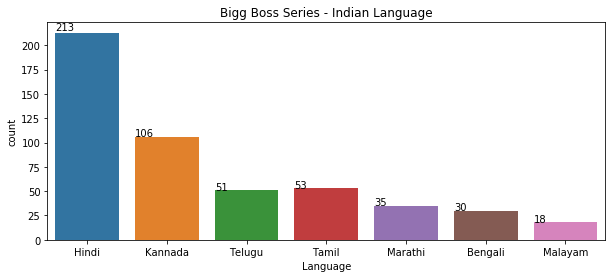

In [16]:
# Total number of housemates
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='Language', data=bigg_boss)
ax.set_title('Bigg Boss Series - Indian Language')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

No     434
Yes     70
Name: Wild Card, dtype: int64


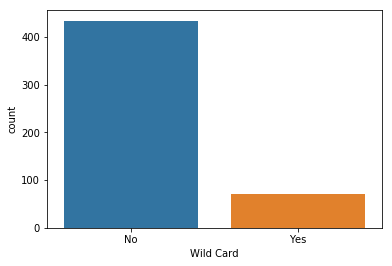

In [17]:
# Number of normal entries and wild card entries
print(bigg_boss['Wild Card'].value_counts())
sns.countplot(x='Wild Card', data=bigg_boss)

Actress         115
Actor            87
Commoner         43
Model            38
Soap Actress     29
               ... 
Humanist          1
Film Critic       1
Lawyer            1
TV presenter      1
Rapper            1
Name: Profession, Length: 69, dtype: int64


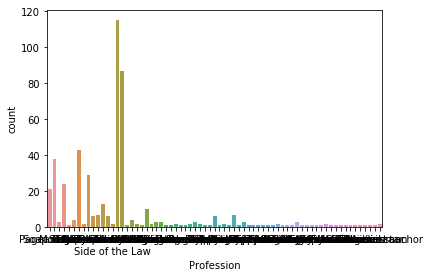

In [18]:
# Participant's Profession
print(bigg_boss['Profession'].value_counts())
#sns.countplot(x='Profession', data=bigg_boss)

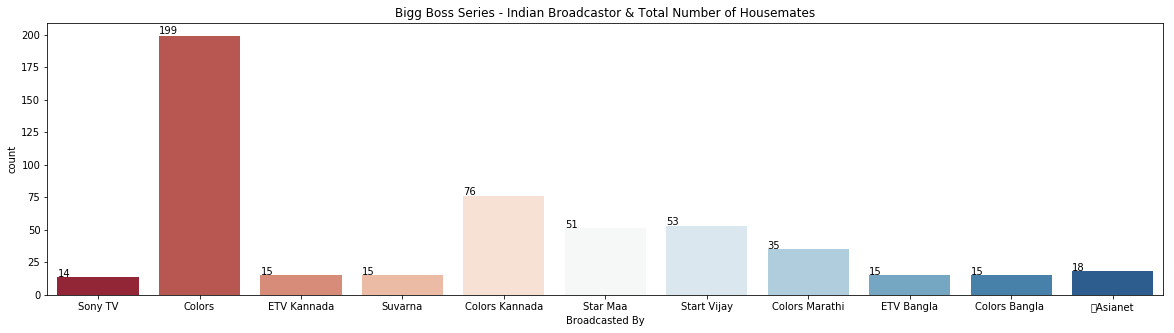

In [21]:
# Broadcastor
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Broadcasted By', data=bigg_boss, palette='RdBu')
ax.set_title('Bigg Boss Series - Indian Broadcastor & Total Number of Housemates')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [20]:
bigg_boss.head()

,Season Number,Name,Profession,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Language,Winner
0,1,Amit Sadh,Soap Actor,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,Hindi,0.0
1,1,Anupama Verma,Model,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,Hindi,0.0
2,1,Aryan Vaid,Pageant Winner,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,Hindi,0.0
3,1,Baba Sehgal,Singer,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,Hindi,0.0
4,1,Bobby Darling,LGBT,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,Hindi,0.0


In [22]:
bigg_boss.tail()

,Season Number,Name,Profession,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Language,Winner
501,1,Shweta Menon,Actress,24-Jun-18,NaN,5.0,No,98,18,24-Jun-18,30-Sep-18,Mohanlal,0,\tAsianet,Malayam,0.0
502,1,Sreelakshmi Sreekumar,Actress,24-Jun-18,NaN,4.0,No,98,18,24-Jun-18,30-Sep-18,Mohanlal,0,\tAsianet,Malayam,0.0
503,1,Srinish Aravind,Soap Actor,24-Jun-18,NaN,14.0,No,98,18,24-Jun-18,30-Sep-18,Mohanlal,0,\tAsianet,Malayam,0.0
504,1,Anjali Ameer,Actress,NaN,NaN,NaN,Yes,98,18,24-Jun-18,30-Sep-18,Mohanlal,0,\tAsianet,Malayam,0.0
505,1,Shiyas Kareem,Actor,NaN,NaN,14.0,Yes,98,18,24-Jun-18,30-Sep-18,Mohanlal,0,\tAsianet,Malayam,0.0


In [27]:
# Null values in the dataset
bigg_boss.isnull().sum()

Season Number                0
Name                         0
Profession                  10
Entry Date                  65
Elimination Date           420
Elimination Week Number    120
Wild Card                    2
Season Length                0
Number of Housemates         0
Season Start Date            0
Season End Date              0
Host Name                    0
Prize Money (INR)           18
Broadcasted By               0
Language                     0
Winner                      18
dtype: int64

Scatter and density plots:

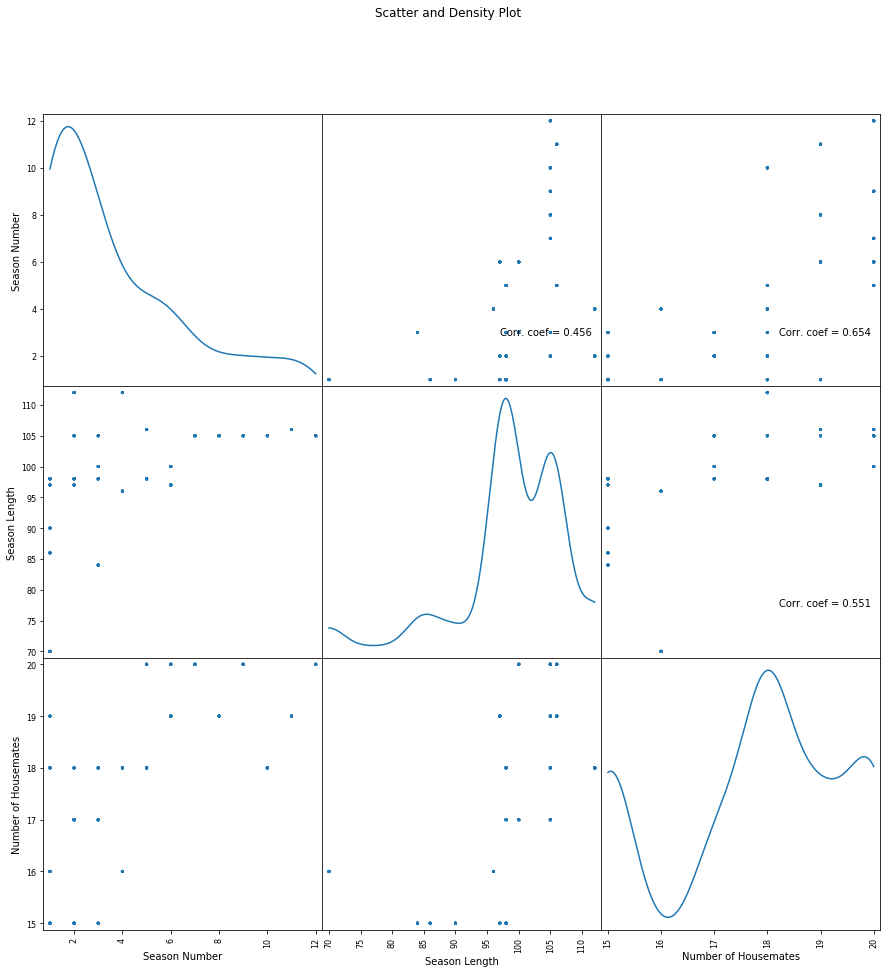

In [24]:
plotScatterMatrix(bigg_boss, 15, 10)

Distribution graphs (histogram/bar graph) of sampled columns:

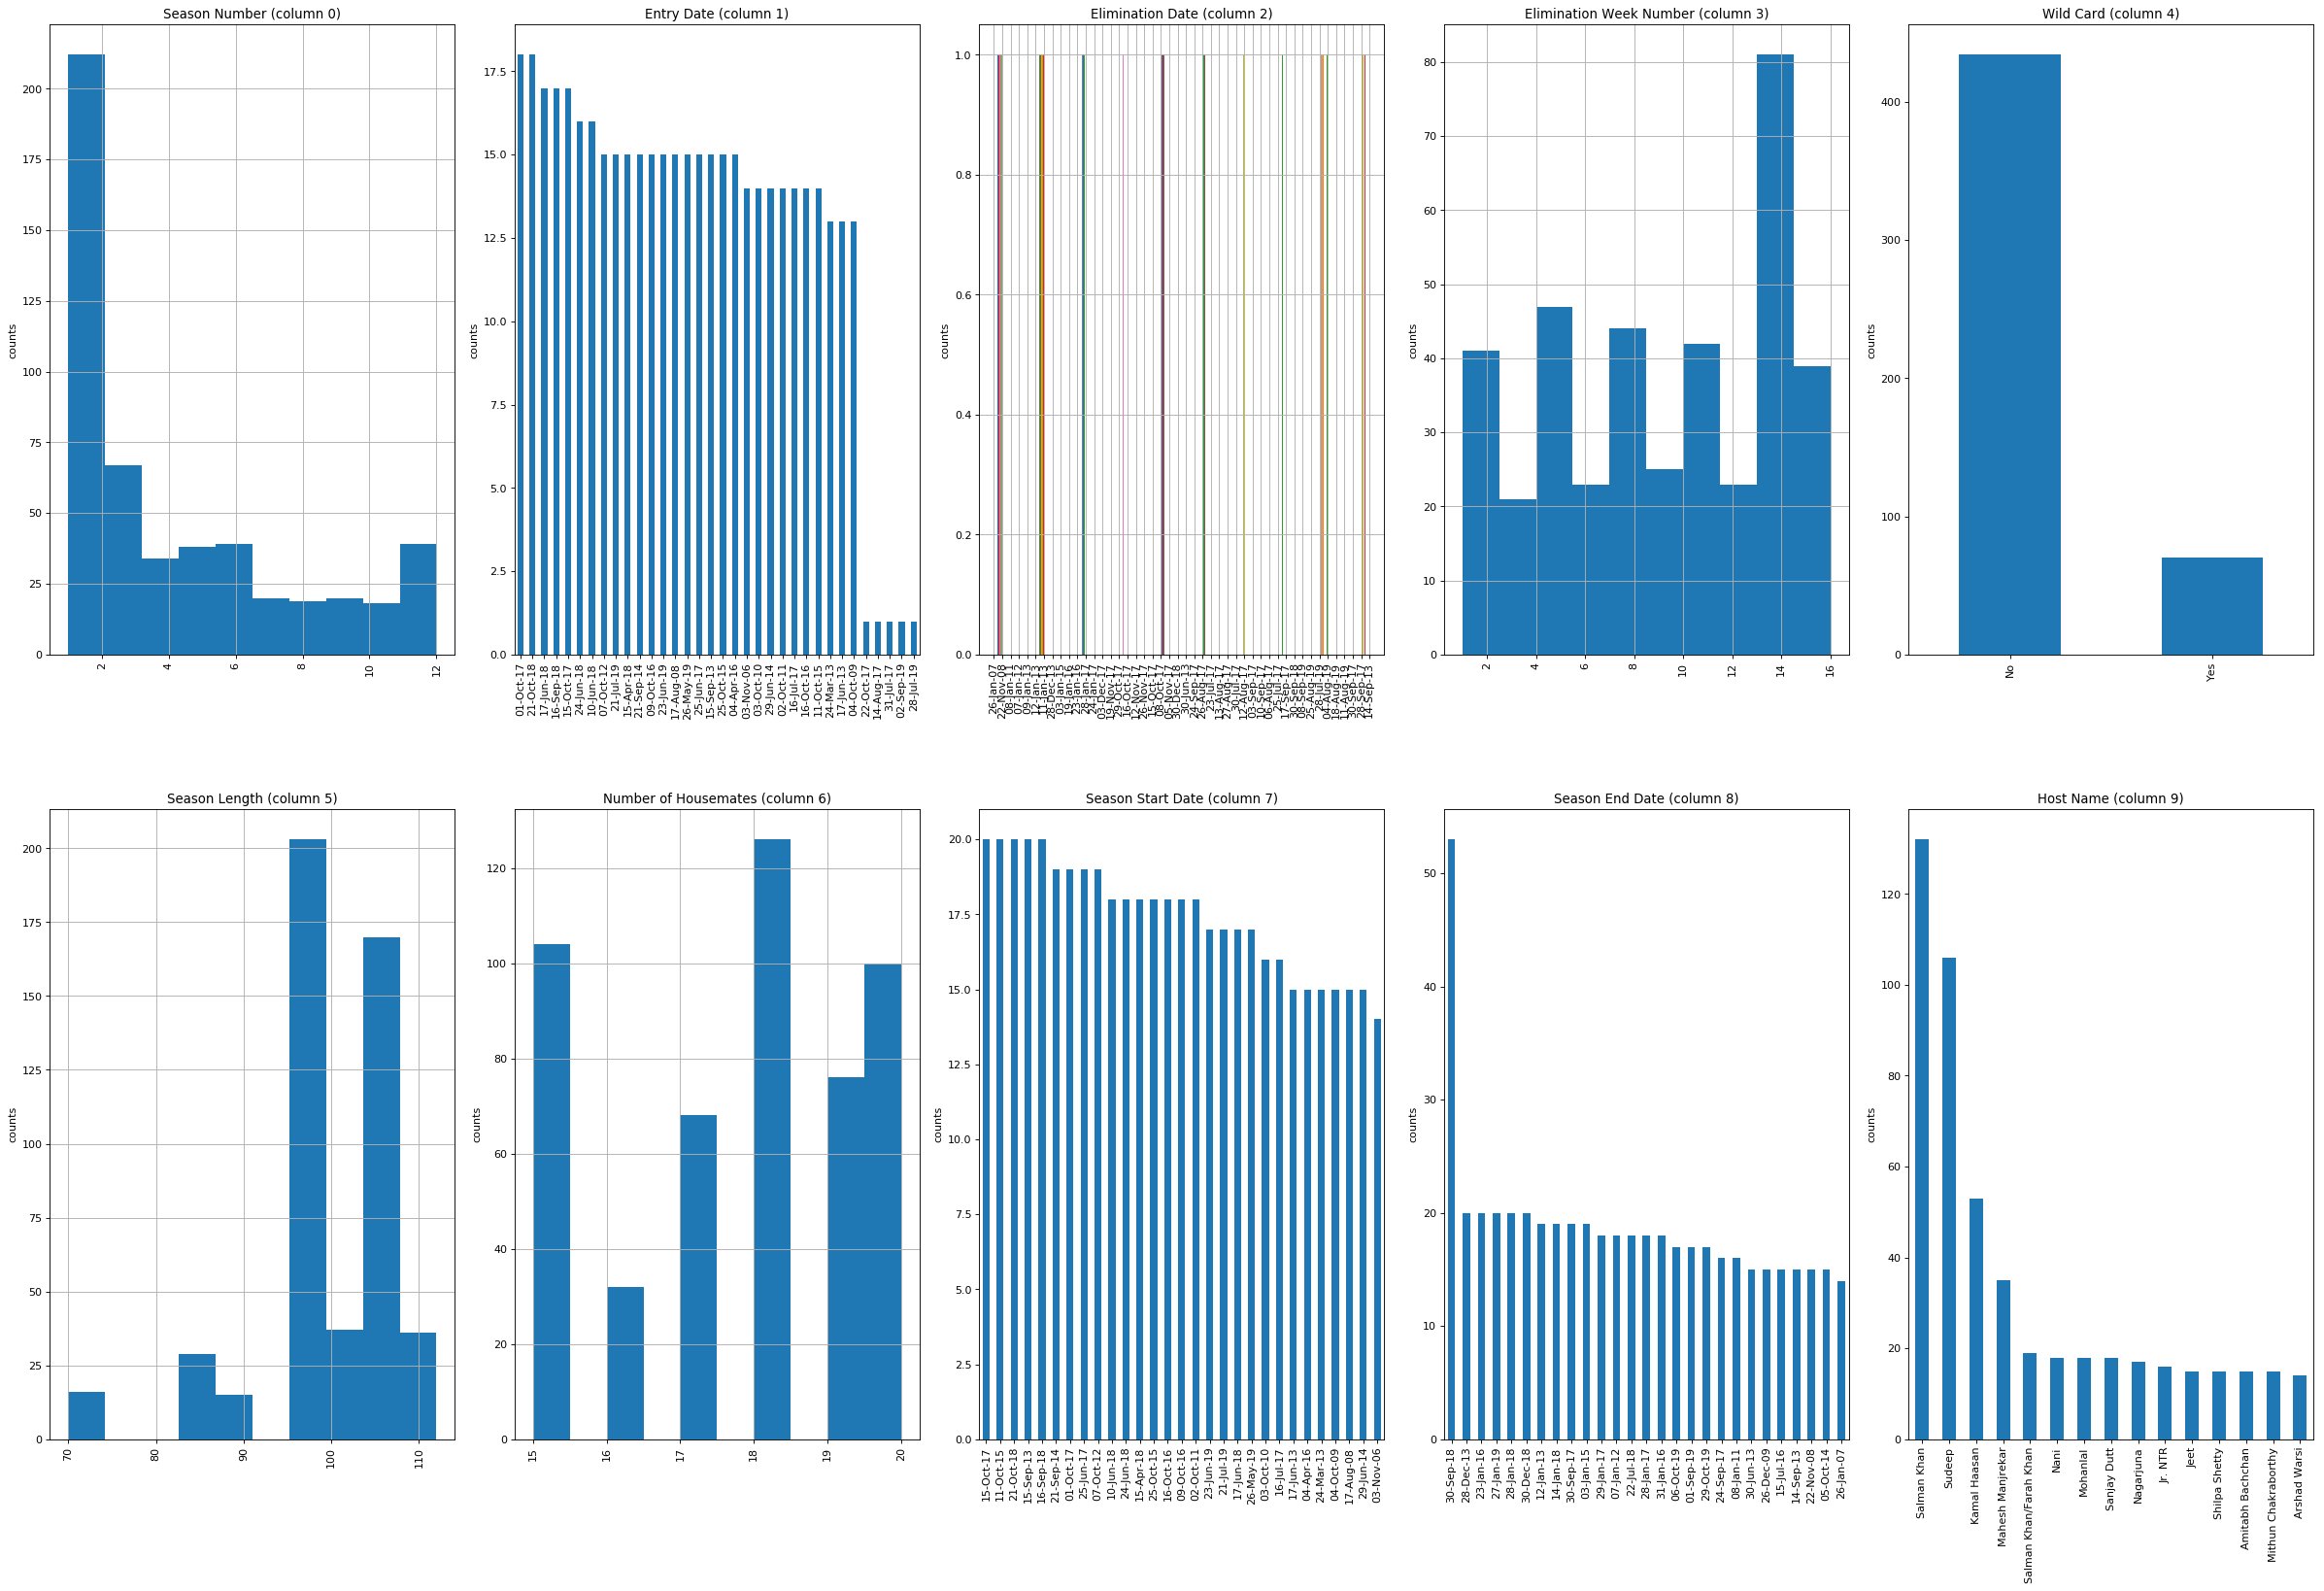

In [25]:
plotPerColumnDistribution(bigg_boss, 10, 5)

Correlation matrix:

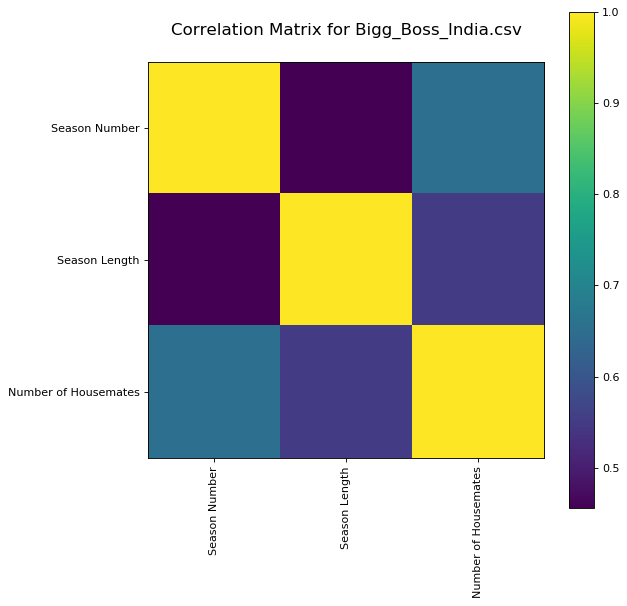

In [26]:
plotCorrelationMatrix(bigg_boss, 8)